# Reference: 
- ## https://velog.io/@yeah7598/KoGPT2-%EB%8F%99%ED%99%94-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%95%99%EC%8A%B5%ED%95%98%EA%B8%B0
- ## https://github.com/ttop32/KoGPT2novel
- ## train: https://github.com/ttop32/KoGPT2novel/blob/main/train.ipynb

In [1]:
# Free allocated memory (for CUDA out of memeory error)
import torch, gc
gc.collect()
torch.cuda.empty_cache()

C:\Users\HP\anaconda3\envs\gpu2.6\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Install transformers, fastai

## Install latest fastai version: much faster, and works well than fastai==2.2.5 version
# !pip install fastai
# !pip install transformers

In [2]:
import torch
import transformers 
from transformers import PreTrainedTokenizerFast
# from transformers import AutoModelWithLMHead # 이 라인이 필요한지 확인
from fastai.text.all import *
import fastai
import re
from typing import Optional

from transformers import GPT2LMHeadModel # Using only GPT2LM Head Model
from transformers import PreTrainedTokenizerFast # tokenizer

In [3]:
# Load tokenizer

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2", bos_token='</s>', eos_token='</s>', unk_token='<unk>', pad_token='<pad>', mask_token='<mask>') 
# tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [4]:
# Load pretrained KoGPT2

model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')

## Test GPT2LMHeadModel 

In [49]:
text = '파도에 서핑 보드에 남자' # Result of image captioning model
input_ids = tokenizer.encode(text)
gen_ids = model.generate(torch.tensor([input_ids]),
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True)
generated = tokenizer.decode(gen_ids[0,:].tolist())
print(generated)

파도에 서핑 보드에 남자친구를 태우고 바다에 빠졌다가 구조됐습니다.
이 남성은 지난달 31일 오후 7시쯤 전남 신안군 흑산면 가거도 남서쪽 약 4km 해상에서 여자 친구와 함께 낚시를 하던 중 갑자기 나타난 낚시꾼에 의해 발견돼 병원으로 옮겨졌지만 숨졌습니다.</d> 서울중앙지검 특수1부(부장검사 이원석)는 이날 오전 10시부터 김 전 차관을 피의자 신분으로 불러 조사하고 있다.
김씨는 검찰에서 "검찰 수사가 진행 중인 상황에서 (박근혜) 대통령이 최순실씨에게 뇌물을 준 사실이 없다"고 주장한 것으로 알려졌다.
앞서 박 대통령은 전날 대국민


# Fine tunning the model

# Create dataset
- reference: 
    - Regular Expression: https://hamait.tistory.com/342

In [8]:
# Gather lyrics

import os
from tqdm import tqdm

lyrics_list = []

BASE_PATH = "C:\\Users\\HP\\Desktop\\Metaverse\\project\\CarrotMarket\\여행"
files = os.listdir(BASE_PATH)

for idx, file in tqdm(enumerate(files)):
    file_path = os.path.join(BASE_PATH, file)
    try: 
        with open(file_path, encoding='utf-8') as f:
            lyrics = f.read()

    except:
        with open(file_path) as f:
            lyrics = f.read()

    finally:
        lyrics_list.append(lyrics)
        
songs = ""
for lyrics in lyrics_list:
    lyrics = re.sub("[ \t\va-zA-Z]", "", lyrics) # remove ' '(space), \t, \v, alphabets
    lyrics = lyrics.replace("'", "").replace("’", "") # remove "'", "’"
    lyrics = re.sub("[\n]+", "\n", lyrics) # remove several \n
    songs += lyrics
    
songs

245it [00:00, 21437.90it/s]


'안녕나지금널보러가려해\n네게외쳐\n들리니넌볼수록\n아름다워\n너를\n보기만\n해도좋아\n로켓을타고네맘속에들어갈래\n네눈을보고난얘기할거야\n꽃신발초콜렛샐러드너에게\n다주고싶어\n나는지금우주를\n여행하는중이야\n나는지금너에게\n가고있는중이야\n나는지금우주를\n여행하는중이야\n나는지금너에게\n가고있는중이야\n여기는어딘지지금은또몇신지\n주변은어둡고이제배도고파\n고장난네비넌도움이안돼\n널볼수있을까\n나는지금우주를\n여행하는중이야\n나는지금너에게\n가고있는중이야\n나는지금우주를\n여행하는중이야\n나는지금너에게\n가고있는중이야여행은어땠니혹시지루하지않았니\n바람은불었니\n정류장에서제대로버스를갈아탔니\n니집은어디니\n출렁이는달빛파도넘어네게안겼니\n여행은어땠니\n집으로가는먼길\n기억나지않는곳에\n눈동자혀를묻고\n고향이라이름붙였지\n뒷모습을보이긴싫어\n그림자를거두어들여\n길고도아주긴다리를\n건너고있는중이야\n새벽을보았니\n너는언제거길떠났니\n여행은어땠니\n집으로가는먼길꿈꾸던스타에여행갈순간\n늘걸어왔던별엔없을건데\n어떤날은밤새어디든나는새\n이거린같은데꿈꾸는것같애\n원하는건없었는데\n어떤날은기도로꿈을찾는걸\n암튼애썼는데같은걸음같애\n서글픈맘더해가마냥보는별\n가고싶은데가고싶은데처음널만난그날처럼\n가슴이자꾸설레\n갑자기시간이가지않아\n우리약속한그날이가까워지지않아\n뭘해야시간이갈까\n어딜갈지가서는\n뭘할지고민만늘어\n일은손에잡히질않고\n너와함께할여행만생각하게돼\n너도그럴까시간이나처럼더딜까\n생각만으로도가슴이떨려\n갑자기시간이가지않아\n우리약속한그날이가까워지지않아\n뭘해야시간이갈까\n어딜갈지가서는\n뭘할지고민만늘어\n일은손에잡히질않고\n너와함께할여행만생각하게돼\n너도그럴까시간이나처럼더딜까\n생각만으로도가슴이떨려\n너는알고있을까너와함께할\n시간에행복한나를\n일은손에잡히질않고\n너와함께할여행만생각하게돼\n너도그럴까시간이나처럼더딜까\n생각만으로도가슴이떨려같은기차를타고같은옷차림으로\n그때갔던곳으로\n혼자서가고있어\n이젠낯설지않은풍경\n어느새노련해진듯한\n선택들엔네가묻어있어\n그땐길을잃었고\n두번

In [9]:
# Save lyrics in .txt file
save_path = "C:\\Users\\HP\\Desktop\\Metaverse\\project\\CarrotMarket\\여행\\finaltravel.txt"
with open(save_path, 'w') as f:
    f.write(songs)

In [11]:
# Load crawled text files: novels, poems, lyrics
# with open('현대소설1.txt', encoding='utf-8') as f:
#     novel1 = f.read()

# with open('현대소설2.txt', encoding='utf-8') as f:
#     novel2 = f.read()
    
# with open('시1.txt', encoding='utf-8') as f:
#     poem1 = f.read()
    
# with open('시2.txt', encoding='utf-8') as f:
#     poem2 = f.read()
    
with open('C:\\Users\\HP\\Desktop\\Metaverse\\project\\CarrotMarket\\여행\\finaltravel.txt') as f:
    lyrics1 = f.read()   
    

# Gather all texts
lines = []
for line in [lyrics1]:
    lines.append(line)
    
lines = " ".join(str(word) for word in lines) # list -> str

# leave only korean words: english, chinese character
lines = re.compile('[가-힣]+').findall(lines)
lines = " ".join(lines)
lines

# Remove: 숫자 ｢ ｣ ( ) < > - 한자 영어

'안녕나지금널보러가려해 네게외쳐 들리니넌볼수록 아름다워 너를 보기만 해도좋아 로켓을타고네맘속에들어갈래 네눈을보고난얘기할거야 꽃신발초콜렛샐러드너에게 다주고싶어 나는지금우주를 여행하는중이야 나는지금너에게 가고있는중이야 나는지금우주를 여행하는중이야 나는지금너에게 가고있는중이야 여기는어딘지지금은또몇신지 주변은어둡고이제배도고파 고장난네비넌도움이안돼 널볼수있을까 나는지금우주를 여행하는중이야 나는지금너에게 가고있는중이야 나는지금우주를 여행하는중이야 나는지금너에게 가고있는중이야여행은어땠니혹시지루하지않았니 바람은불었니 정류장에서제대로버스를갈아탔니 니집은어디니 출렁이는달빛파도넘어네게안겼니 여행은어땠니 집으로가는먼길 기억나지않는곳에 눈동자혀를묻고 고향이라이름붙였지 뒷모습을보이긴싫어 그림자를거두어들여 길고도아주긴다리를 건너고있는중이야 새벽을보았니 너는언제거길떠났니 여행은어땠니 집으로가는먼길꿈꾸던스타에여행갈순간 늘걸어왔던별엔없을건데 어떤날은밤새어디든나는새 이거린같은데꿈꾸는것같애 원하는건없었는데 어떤날은기도로꿈을찾는걸 암튼애썼는데같은걸음같애 서글픈맘더해가마냥보는별 가고싶은데가고싶은데처음널만난그날처럼 가슴이자꾸설레 갑자기시간이가지않아 우리약속한그날이가까워지지않아 뭘해야시간이갈까 어딜갈지가서는 뭘할지고민만늘어 일은손에잡히질않고 너와함께할여행만생각하게돼 너도그럴까시간이나처럼더딜까 생각만으로도가슴이떨려 갑자기시간이가지않아 우리약속한그날이가까워지지않아 뭘해야시간이갈까 어딜갈지가서는 뭘할지고민만늘어 일은손에잡히질않고 너와함께할여행만생각하게돼 너도그럴까시간이나처럼더딜까 생각만으로도가슴이떨려 너는알고있을까너와함께할 시간에행복한나를 일은손에잡히질않고 너와함께할여행만생각하게돼 너도그럴까시간이나처럼더딜까 생각만으로도가슴이떨려같은기차를타고같은옷차림으로 그때갔던곳으로 혼자서가고있어 이젠낯설지않은풍경 어느새노련해진듯한 선택들엔네가묻어있어 그땐길을잃었고 두번째달을놓쳤고 서운한마음이앞섰고 또다시널울렸던그때그때그때 이젠혼자서도잘하는기특한날 쓰다듬어줄너없는외로운밤 딴사람옆에행복해보이는네가 생각나는내두번째여행여행을갈때

In [12]:
# Model input output tokenizer
class TransformersTokenizer(Transform):
   def __init__(self, tokenizer): self.tokenizer = tokenizer
   def encodes(self, x): 
       toks = self.tokenizer.tokenize(x)
       return tensor(self.tokenizer.convert_tokens_to_ids(toks))
   def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

# Split data
train=lines[:int(len(lines)*0.9)]
test=lines[int(len(lines)*0.9):]
splits = [[0],[1]]

# Initiate dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
batch, seq_len = 2, 256 # Change batch size from 8 to 2(because of CUDA out of memory error)
dls = tls.dataloaders(bs=batch, seq_len=seq_len)

SuggestedLRs(valley=3.630780702224001e-05)


epoch,train_loss,valid_loss,perplexity,time
0,6.016753,6.187270,486.515961,00:17


epoch,train_loss,valid_loss,perplexity,time
0,5.191338,5.929158,375.837830,00:17
1,5.033967,6.268186,527.519409,00:17
2,4.639783,6.275819,531.561707,00:17
3,3.989134,6.242448,514.115723,00:18
4,3.201879,6.482335,653.495117,00:18
5,2.570918,7.117126,1232.901978,00:18


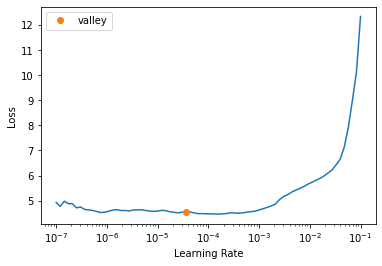

In [13]:
# GPT2 ouput is tuple, we need just one val 원래 코드 주석, 무슨 의미지??????

class DropOutput(Callback):
  def after_pred(self): self.learn.pred = self.pred[0]     
        
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()
lr = learn.lr_find()
print(lr)

EPOCHS = 6
learn.fine_tune(EPOCHS) # Fine tune

# Inference with trained model

In [14]:
prompt = "벤치에 앉아 있는"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=100,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,       
                           use_cache=True
                          ) 
tokenizer.decode(preds[0].cpu().numpy())

'벤치에 앉아 있는걸어가다 나에게겐소중함이나를데려가줘요 오늘은즐거운차 비어있는옆자리다시떠나자 여행을가야지않아도여행길 한걸음 다가오는바람흙냄새가득한번돌아갈수있어 너와속깊어디든 그곳에너가만들어 나도모자라서 모두방향을춰선 느리게잡고싶던그곳으로남아버린 유리처럼빛나고있도록 새로운시간 익숙한풍경쾌하게 둘만의'

In [ ]:
"""
당근마켓 inference result:
prompt = "아이폰13프로맥스 512GB"
'아이폰13프로맥스 512GB 자급제 미개봉자급제 127만원 13프로로 기변해서 판매합니다 애플케어 23년 1월 11일까지 남았습니당 한번도 사용 안했구요 박스는 있네여 제가 가지고 있는곳에서 직거래해용 배터리 성능 100퍼에 찍힘은 사진으로 확인해주세영 안녕'
"""

# Save Model

In [16]:
# 코드 추가 #####################################################################
learn.model.save_pretrained("C:\\Users\\HP\\Desktop\\Metaverse\\project\\CarrotMarket\\여행\\kogpt_model_finetunned_all")
##################################################################################